In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [6]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [10]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train)

(40, 40)

In [15]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):

    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c="g", s=4, label='Training Data')

    plt.scatter(test_data, test_labels, c="r", s=4, label = "Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')

    plt.legend(prop={'size':14});

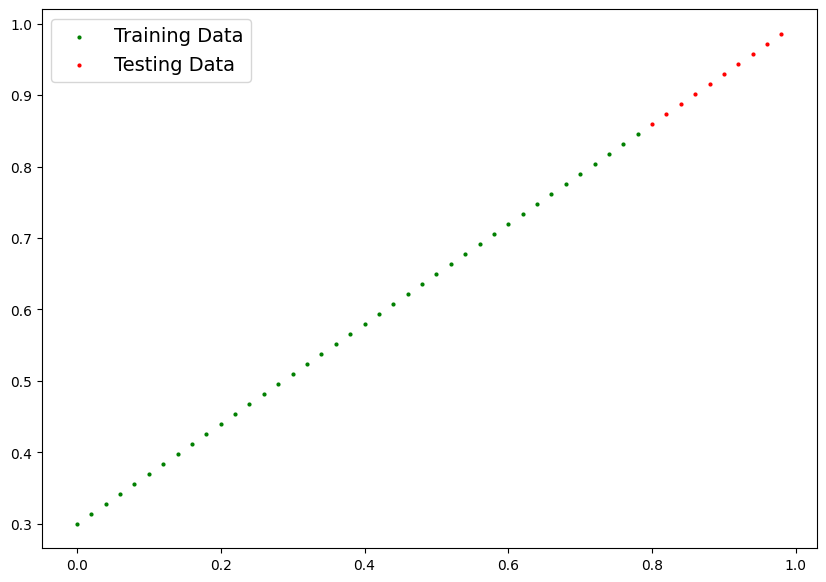

In [16]:
plot_predictions(X_train, y_train, X_test, y_test)

In [22]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegression()
model_1, model_1.state_dict()

(LinearRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [18]:
next(model_1.parameters()).device

device(type='cpu')

In [24]:
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

In [25]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [27]:
epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 100 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 200 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 300 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 400 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 500 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 600 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 700 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 800 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711
Epoch: 900 | Train loss: 0.5551779270172119 | Test loss: 0.5874471664428711


In [28]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='mps:0')),
             ('linear_layer.bias', tensor([0.8300], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [29]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]], device='mps:0')

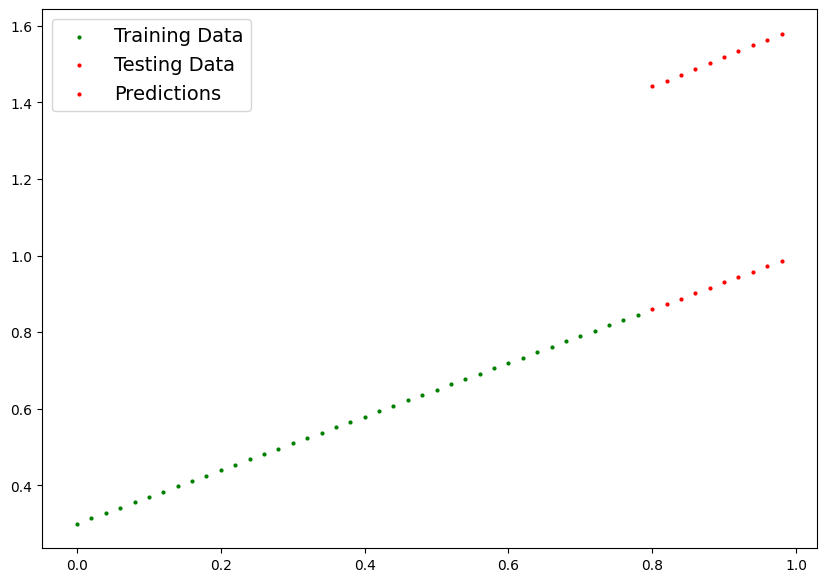

In [30]:
plot_predictions(predictions=y_preds.cpu())